<a href="https://colab.research.google.com/github/jsebastianquiroga/Topicos_analitica/blob/main/Notebook/Social_Network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img style="float: center; padding-right: 10px;" src="https://www.pikpng.com/pngl/b/467-4670553_universidad-javeriana-esslingen-am-neckar-clipart.png" width="100" height="150">



<h1> <strong>Tópicos avanzados en analítica.</strong></h1> 
<h2> Para: Luis Gabriel Moreno Sandoval.</br></h2>
<h2>Integrantes:</br></h2>
<h2>Alejandro Vivas.</br></h2>
<h2>Jhoan Sebastian Muñoz.</br></h2>
<h2>Juan Sebastián Quiroga Bernal. </h2>

**Este colab puede ser ejecutado por cualquier usuario sin necesidad de cargar los archivos al entorno, debido a que la conexión está configurada para acceder a los archivos desde la nube**.


<h1> <strong>Workshop 1: Power Laws and Graph.</strong></h1> 

Hemos hablado de leyes de potencia y redes aleatorias. Una de esas leyes de potencia se produce en relación con 
la topología de las redes naturales: La mayoría de los nodos tienen pocas conexiones, y pocos nodos tienen la mayoría de las 
conexiones. Estas estructuras de red tienen importantes consecuencias en la dinámica del 
sistema asociado: Redes de transporte, redes de comunicación, redes metabólicas, 
redes epidemiológicas, redes sociales, etc. Vamos a repasar algunos conceptos relacionados.

El presente notebook, estará dividido en divido en las siguientes partes:
<ol>
<li> Redes sintéticas:. </li>
<li> Redes Naturales. </li>
<li> Conclusiones.</li>
</ol>

***

# <h1><strong> 1. Redes sintéticas: </h1></strong>

Se construiran dos redes, se comenzara con dos nodos, y posteriormente se conecatará aleatoriamente con alguno de los existentes. </br>

<ol>
<li> Primera red: Elección mediante una distribución uniforme entre los nodos existentes.</li>
<li> Segunda red: Con base a las conexiones de cada nodo existente, se computa el grado de las dos distribuciones. </li>
<li> Comparación. </li> </ol>

## 1.1. Primera red: Elección mediante una distribución uniforme entre los nodos existentes.

In [1]:
pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install networkx --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Se importan las Librerias a utilizar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import networkx as nx
import collections 

import statistics
import random
from random import randint



Nodos iniciales de la red Sitética: [1, 2]
Conexiones iniciales de la red Sitética: [(1, 2)]
------------------------------------------------------


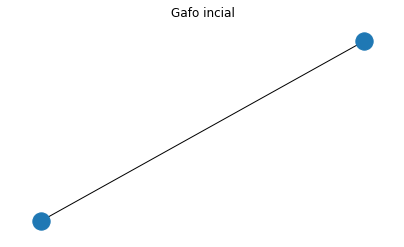

In [4]:
#Crear objeto grafo, con sus dos primeros nodos y conexiones.
G1 = nx.Graph()
G1.add_node(1)
G1.add_node(2)
G1.add_edge(1,2)

print('Nodos iniciales de la red Sitética:', G1.nodes)
print('Conexiones iniciales de la red Sitética:', G1.edges)
print('------------------------------------------------------')
#Generacion del grafo RANDOM

plt.figure(figsize=(7,4))
plt.title('Gafo incial')

nx.draw_circular(G1)

In [5]:
!pip install --upgrade networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
  #Se define una funcion que crea una red sintetica con una distribución uniforme
  #toma como entradas la cantidad de conexiones total que se quiere para red, el tamaño de sus nodos totales y la cantidad de nodos iniciales.
  def generate_random_graph(Edges, Nodes, inicial_nodes):

      # Se crea una matriz adjacente de 0 con dimenciones N x N
      A = np.zeros((Nodes, Nodes))

      # Conexión aleatoria
      for i in range(inicial_nodes, Edges, 1):

        # Elexion de los dos nodos inciales.
        for node in range(inicial_nodes):

          ini_node=randint(0,i-1)

          if i< Nodes:
            G1.add_node(i)
            G1.add_edge(i,ini_node)
          else:
            node1=randint(0,Nodes)
            node2=randint(0,Nodes)
            G1.add_edge(node1,node2)
            
      return G1

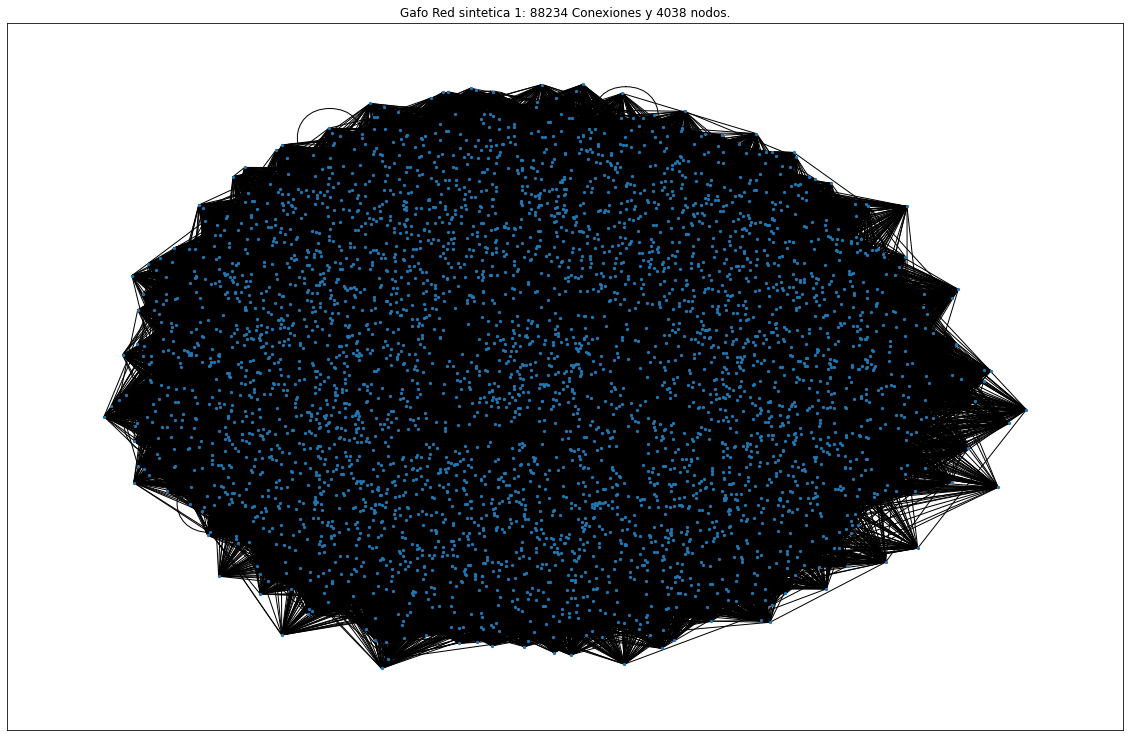

In [7]:
# Se crea un red GS1 con 88234 Conexiones y 4038 nodos.
GS1 = generate_random_graph(88234, 4038, 2)
plt.figure(figsize=(20,13))
plt.title('Gafo Red sintetica 1: 88234 Conexiones y 4038 nodos.')

pos = nx.spring_layout(GS1)
nx.draw_networkx_nodes(GS1,pos,node_size=5)
nx.draw_networkx_edges(GS1,pos, alpha=1)

In [8]:
print('Nodos iniciales de la red Sitética:', GS1.number_of_nodes())
print('Conexiones iniciales de la red Sitética:', GS1.number_of_edges())
print('------------------------------------------------------')

Nodos iniciales de la red Sitética: 4039
Conexiones iniciales de la red Sitética: 174539
------------------------------------------------------


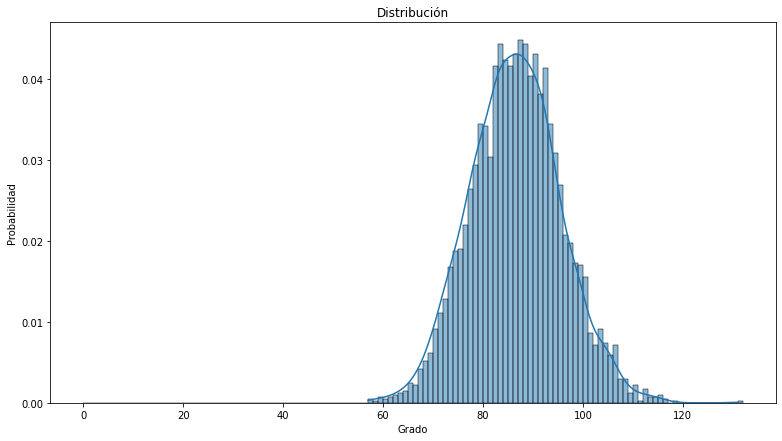

In [9]:
# Se calcula el grado de cada nodo.
degrees = dict(GS1.degree())
plt.figure(figsize=(13,7))
# histograma
sns.histplot(list(degrees.values()), bins=range(0, max(degrees.values())+2, 1), stat='density', kde=True)
plt.title("Distribución")
plt.xlabel("Grado")
plt.ylabel("Probabilidad")


#ver
plt.show()

## 2.1.Segunda red: Con base a las conexiones de cada nodo existente, se computa el grado de las dos distribuciones. Free scale ##

In [10]:
  #Se define una funcion que crea una red sintetica con una distribución Free Sclare
  #toma como entradas la cantidad de conexiones total que se quiere para red y la cantidad de nodos
  def generate_scale_free_graph(n_edges, n_nodes):
      # Se inicializa el objeto grafo, con dos nodos iniciales
      G = nx.Graph()
      G.add_node(1)
      G.add_node(2)
      G.add_edge(1, 2)

      # Inicializa grado de los primeros nodos.
      degrees = {1: 1, 2: 1}

      # Se agrega a un nodo y conexion existente en la red.
      for i in range(2, n_nodes):
          # Seleccion del nodo.
          new_node = i + 1

          # Conectar basado en la probabilidades
          total_degree = sum(degrees.values())
          probabilities = [degree / total_degree for degree in degrees.values()]
          connected_node = np.random.choice(list(degrees.keys()), p=probabilities)

          # Agrega conexion y nodo
          G.add_node(new_node)
          G.add_edge(new_node, connected_node)

          # actualización de grado de los nodos.
          degrees[connected_node] += 1
          degrees[new_node] = 1

      # Relacion de conexiones.
      while G.number_of_edges() < n_edges:
          # Selección de nodos a conectar.
          node1, node2 = np.random.choice(list(G.nodes()), size=2, replace=False)

          # Crear el nodo si no existe.
          if not G.has_edge(node1, node2):
              G.add_edge(node1, node2)

              # Actualizar el grado.
              degrees[node1] += 1
              degrees[node2] += 1

      return G

Nodos iniciales de la red Sitética: 4039
Conexiones iniciales de la red Sitética: 88234
------------------------------------------------------


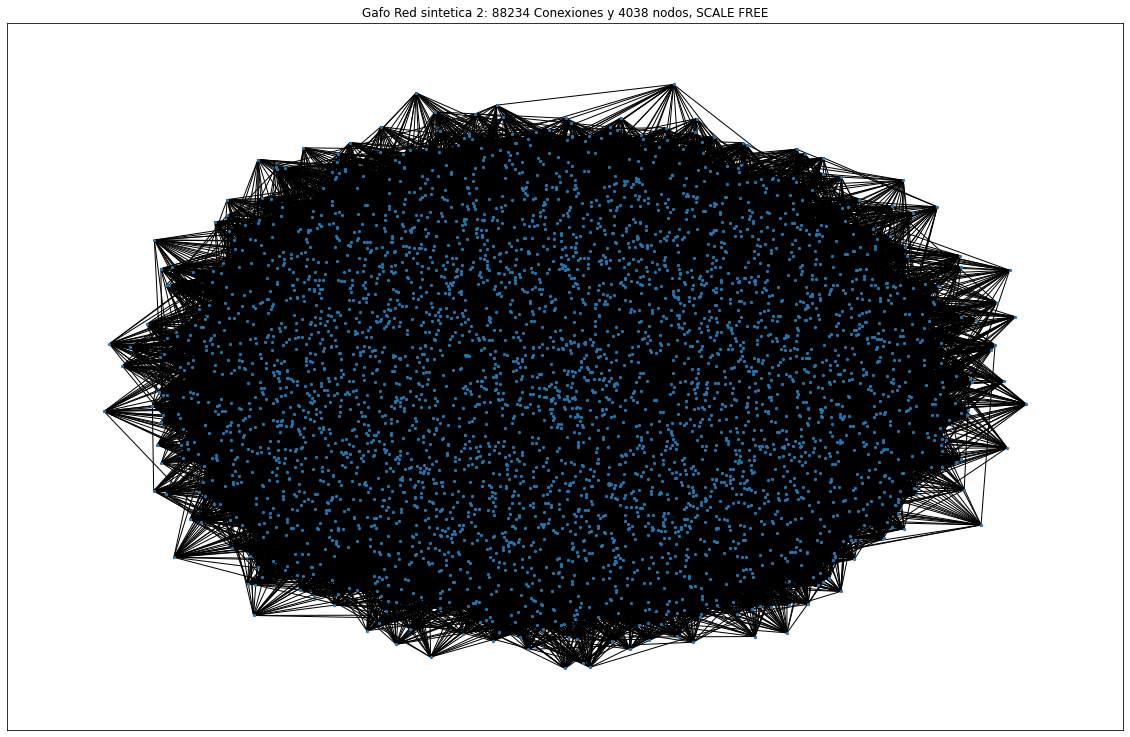

In [11]:
Gs2 = generate_scale_free_graph(n_edges=88234, n_nodes=4039)
print('Nodos iniciales de la red Sitética:', Gs2.number_of_nodes())
print('Conexiones iniciales de la red Sitética:', Gs2.number_of_edges())
print('------------------------------------------------------')
plt.figure(figsize=(20,13))
plt.title('Gafo Red sintetica 2: 88234 Conexiones y 4038 nodos, SCALE FREE')

pos = nx.spring_layout(Gs2)
nx.draw_networkx_nodes(Gs2,pos,node_size=5)
nx.draw_networkx_edges(Gs2,pos, alpha=1)

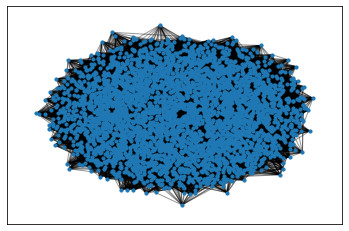

In [12]:
#GRAFICO DISTRIBUCION SCALE FREE
pos = nx.spring_layout(Gs2, seed=10396953)
nx.draw_networkx_nodes(Gs2,pos,node_size=10)
nx.draw_networkx_edges(Gs2,pos, alpha=0.4)

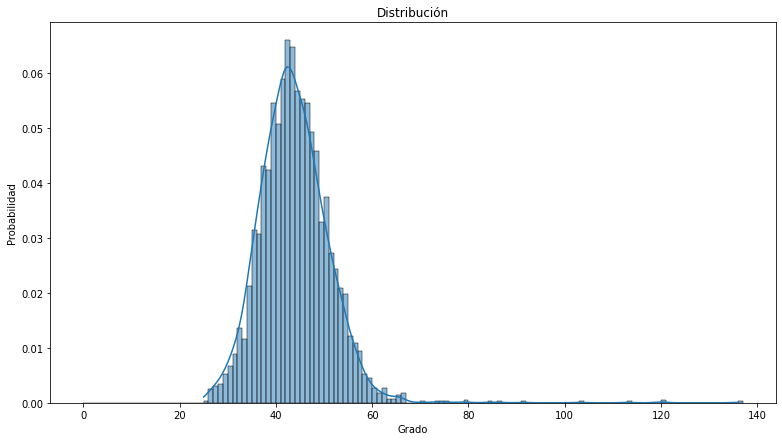

In [13]:
# Se calcula el grado de cada nodo.
degrees_2 = dict(Gs2.degree())
plt.figure(figsize=(13,7))
# histograma
sns.histplot(list(degrees_2.values()), bins=range(0, max(degrees_2.values())+2, 1), stat='density', kde=True)
plt.title("Distribución")
plt.xlabel("Grado")
plt.ylabel("Probabilidad")


#ver
plt.show()

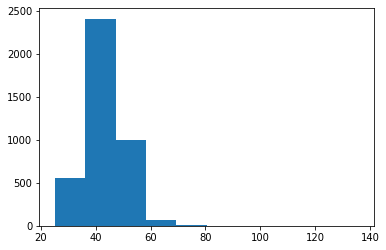

In [14]:

#DEFINICION GRAFICO DE DISTRIBUCION
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()
plot_degree_dist(Gs2)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


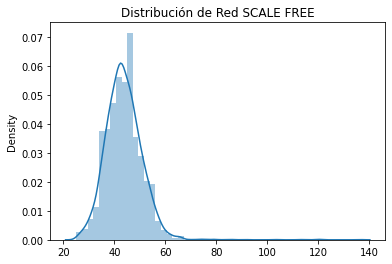

In [15]:
import seaborn as sns

def plot_degree_dist(G, title):
    degrees = [G.degree(n) for n in G.nodes()]
    sns.distplot(degrees)
    plt.title(title)
    plt.show()

plot_degree_dist(Gs2, 'Distribución de Red SCALE FREE')

# <h1><strong> 2. Redes Facebook: </h1></strong>

Con un archivo que relaciona los links de 4039 estudiantes en algun departamento de una universidad.

Se computara la distribución de los grados. </br>

In [16]:
# Conexion a gdrive
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [17]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

txt = '1iqJCWz_qyY4zEgNXlquXDOoRPG0trKTC' 


download = drive.CreateFile({'id': txt}) 
download.GetContentFile('Workshop 1_facebookNetwork.txt')



In [18]:
#LECTURA NODOS Y EDGES FACEBOOK
Gfb = pd.read_csv(r'Workshop 1_facebookNetwork.txt',sep=' ')
Gfb.head()

,0,1
0,0,2
1,0,3
2,0,4
3,0,5
4,0,6


Nodos iniciales de la red Sitética: 4039
Conexiones iniciales de la red Sitética: 88233
------------------------------------------------------


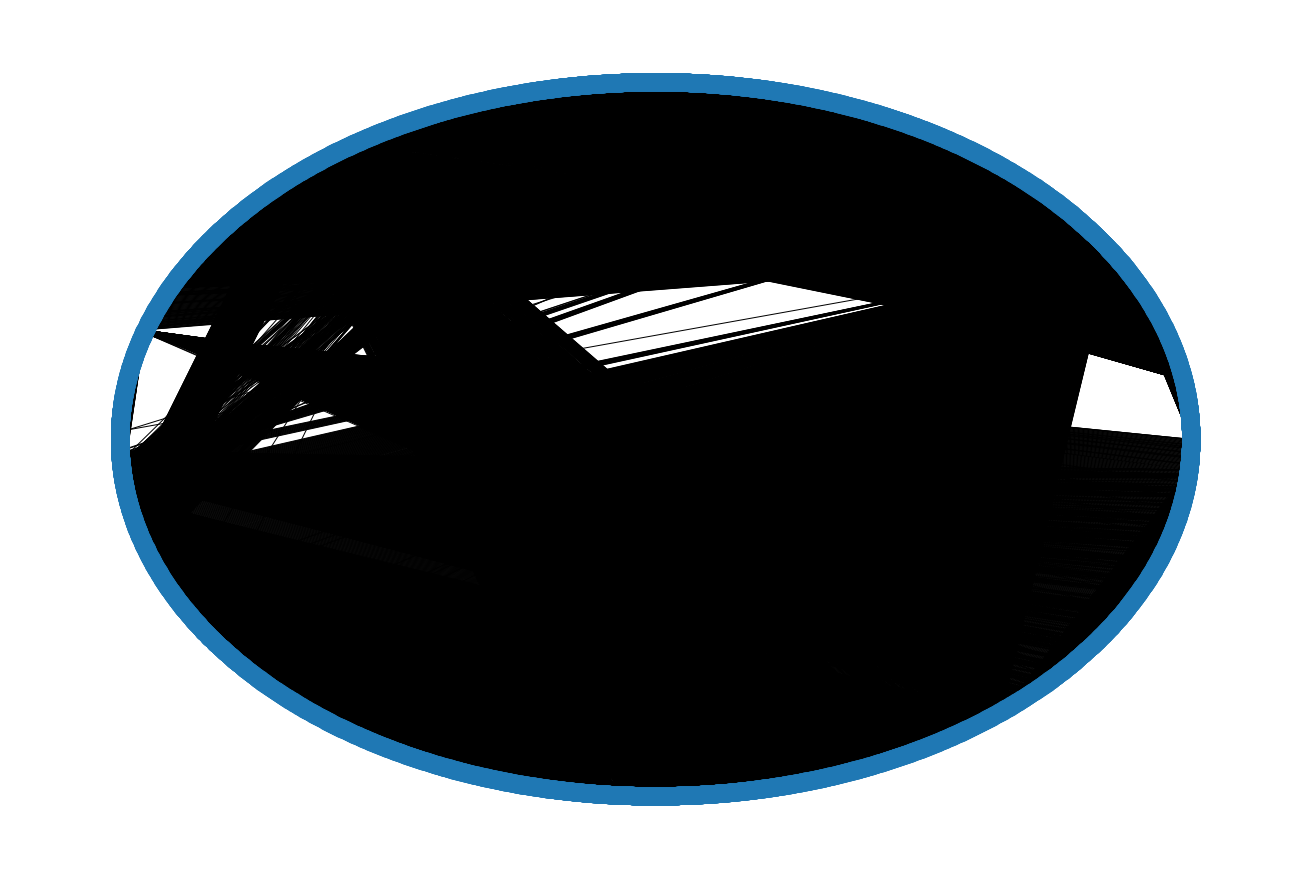

In [19]:
#GENERACION GRAFO FACEBOOK
H = nx.Graph()
fb_list = Gfb.values.tolist()
H.add_edges_from(fb_list)
print('Nodos iniciales de la red Sitética:', H.number_of_nodes())
print('Conexiones iniciales de la red Sitética:', H.number_of_edges())
print('------------------------------------------------------')
plt.figure(figsize=(18,12))
nx.draw_circular(H)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


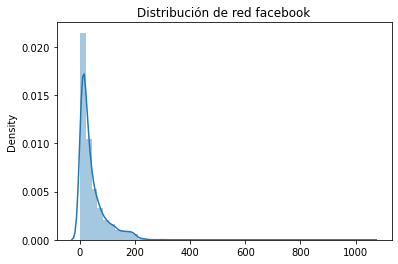

In [20]:
#DISTRIBUCION GRAFO FACEBOOK
plot_degree_dist(H, 'Distribución de red facebook')